In [52]:
import pandas as pd
import numpy as np
from pathlib import Path
import curveball
from matplotlib import pyplot as plt

# Estimate growth rates from growth curves
Note: Run in conda environment with curveball

In [53]:
folder = Path('../../../data/vila_2023/')
# Growth data
growth_fn = folder / 'Targeted_LCMS_Growth_Curves.csv'
growth_df= pd.read_csv(growth_fn)
growth_df.replace('Psuedomonas', 'Pseudomonas', inplace=True)

peak_df = pd.read_csv(folder / 'growth_curves_peaktimes.csv', index_col=0)

In [54]:
growth_df['Carbon_Source'].unique()

array(['Ctrl', 'D-Glucose', 'D-Fructose', 'D-Galactose', 'D-Ribose',
       'L-Arabinose', 'Glycerol', 'Pyruvate', 'Succinate', 'Fumarate',
       'L-Malate', 'Acetate'], dtype=object)

In [55]:
growth_df.groupby('Strain').nunique()


,Well,OD,Time,Carbon_Source,Replicate
Strain,,,,,
Ecoli,24,1597,289,12,2
Enterobacter,24,2470,289,12,2
Pputida,24,2277,289,12,2
Pseudomonas,24,2384,289,12,2


In [56]:
def store_results(strain, cs, well, model_fits = None, idx = None):
    res = {}
    # res['folder'] = os.path.dirname(filepath)
    # res['filename'] = os.path.splitext(os.path.basename(fn))[0]
    res['Strain'] = strain
    res['Carbon source'] = cs
    res['Well'] = well
    
   
    curr_idx = idx
    if model_fits:
        mu = np.nan
        while np.isnan(mu):
            # print(s, cs, idx)
            fit = model_fits[idx]
            res['model'] = fit.model.name
            res['RSS'] = fit.chisqr
            res['RMSD'] = np.sqrt(res['RSS'] / fit.ndata)
            # res['NRMSD'] = res['RMSD'] / (strain_df.OD.max() - strain_df.OD.min())
            # res['CV(RMSD)'] = res['RMSD'] / (strain_df.OD.mean())
            res['bic'] = fit.bic
            res['aic'] = fit.aic
            res['weighted_bic'] = fit.weighted_bic
            res['weighted_aic'] = fit.weighted_aic
            params = fit.params
            res['y0'] = params['y0'].value
            res['K'] = params['K'].value
            res['r'] = params['r'].value
            res['nu'] = params['nu'].value if 'nu' in params else 1
            res['q0'] = params['q0'].value if 'q0' in params else 0
            res['v'] = params['v'].value if 'v' in params else 0
            res['has_lag'] = curveball.models.has_lag(model_fits)
            res['has_nu'] = curveball.models.has_nu(model_fits)
            res['max_growth_rate'] = curveball.models.find_max_growth(fit)[-1]
            res['min_doubling_time'] = curveball.models.find_min_doubling_time(fit)
            res['lag'] = curveball.models.find_lag(fit)
            mu = res['max_growth_rate']
            if idx == curr_idx:
                idx = 0
                curr_idx = np.inf
            else:
                idx += 1
        
            if idx >= len(model_fits):
                print('No growth rate found')
                break
    return res

In [57]:
well_to_PT = peak_df.set_index('Well')['Peak time'].to_dict()

In [58]:
len(well_to_PT)

88

In [59]:
wells = sorted(growth_df['Well'].unique())

## Correct initial OD
The maximum OD of the precultures was 1.5 (minimum 0.2) and then diluted 10000. Thus maximum initial OD is 1.5/10000= 0.00015

In [60]:
max_inital_od = 1.5/10000
for w in wells:
    idxw = growth_df['Well'] == w
    dfw = growth_df[idxw]
    correction = dfw.loc[dfw.Time <1, 'OD'].mean() - max_inital_od
    growth_df.loc[idxw, 'Corrected OD'] = growth_df.loc[idxw, 'OD'] - correction
growth_df.loc[growth_df.Time<2, 'Corrected OD'] = np.nan

0 A01
No growth for A01
1 A02
2 A03
3 A04
4 A05
5 A06
6 A07
7 A08
8 A09


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


No growth rate found
9 A10


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


10 A11
11 A12


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


No growth rate found
12 B01
No growth for B01
13 B02
14 B03
15 B04
16 B05
17 B06
18 B07
19 B08
20 B09
21 B10
22 B11
23 B12


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


24 C01
No growth for C01
25 C02
26 C03
27 C04
28 C05
29 C06
30 C07
31 C08
32 C09
33 C10
34 C11
35 C12
36 D01
No growth for D01
37 D02
38 D03
39 D04
40 D05
41 D06
42 D07
43 D08
44 D09
45 D10
46 D11
47 D12
48 E01
No growth for E01
49 E02
50 E03
51 E04
52 E05
53 E06
54 E07
55 E08
56 E09


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


57 E10


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


No growth rate found
58 E11
59 E12


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


60 F01
No growth for F01
61 F02
62 F03
63 F04
64 F05
65 F06
66 F07
67 F08
68 F09
69 F10
70 F11
71 F12
72 G01
No growth for G01
73 G02
74 G03
75 G04
76 G05


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


77 G06
78 G07
79 G08
80 G09
81 G10
82 G11
83 G12
84 H01
No growth for H01
85 H02
86 H03
87 H04
88 H05


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


No growth rate found
89 H06
90 H07
91 H08


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


92 H09
93 H10
94 H11
95 H12


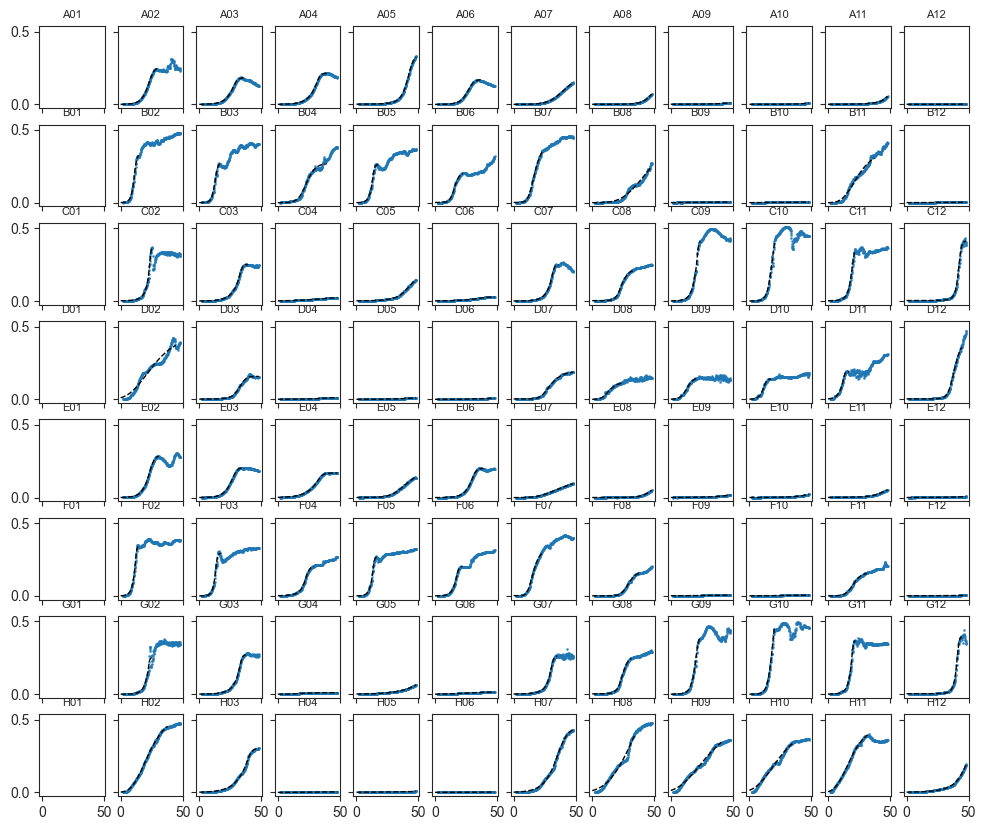

In [61]:
time_buffer = 2
list_of_dicts = []
fig, axes = plt.subplots(8, 12, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, w in enumerate(wells):
    print(i, w)
    ax = axes[i]
    ax.set_title(w, fontsize = 8)

    try:
        peak_time = well_to_PT[w]
    except KeyError:
        print(f'No growth for {w}')
        continue
    # Get the growth data for this well
    dfw = growth_df[growth_df.Well == w]
    s = dfw['Strain'].values[0]
    cs = dfw['Carbon_Source'].values[0]

    dfit = dfw.loc[dfw['Time']<=peak_time+time_buffer,:].copy()
    dfit['OD'] = dfit['Corrected OD']
    dfit.dropna(inplace=True)
    model_fit = curveball.models.fit_model(dfit, PRINT=False, PLOT = False, models = None)

    bri_idx = 0 # Use best fit
    t = np.linspace(0, model_fit[bri_idx].userkws['t'].max())
    y_pred = model_fit[bri_idx].model.eval(t=t, params=model_fit[bri_idx].params)
                
    # Plot the data
    ax.scatter(dfw['Time'], dfw['Corrected OD'], s = 1, alpha = 0.7, c = f'C{0}')

    ax.plot(t,y_pred, c = 'k', ls = '--', lw = 1)
    
    # Store results 
    dic = store_results(s, cs, w, model_fit, bri_idx)
    list_of_dicts.append(dic)
# row +=1
plt.show()

In [62]:
res_df = pd.DataFrame(list_of_dicts)

In [63]:
res_df.to_csv(folder / 'growth_curves_fits.csv')